(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Accuracy: 0.97
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



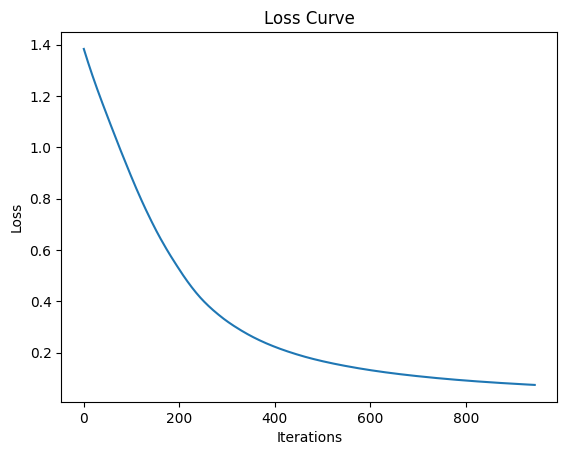

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load and Explore the Iris dataset: Use the print function to display the shape of the data and explore the first 5 rows of the Iris dataset.
iris = load_iris()
X = iris.data
y = iris.target

# Display the shape and first 5 rows
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data.shape)
print(data.head())

# 2. Preprocess the Data: Scale the features using StandardScaler.
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train an MLP Classifier: Train the MLP with a single hidden layer of 10 neurons and the 'relu' activation function.
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 4. Evaluate the Model: Print the classification report and calculate the accuracy on the test set.
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# 5. Visualize the Loss Curve: Plot the loss curve to see how the loss changes during training.
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()
